# Phishing Email Dataset Inspection

## Datasets:
- CEAS_08.csv
- Enron.csv
- Ling.csv
- Nazario_5.csv
- Nazario.csv
- Nigerian_5.csv
- Nigerian_Fraud.csv
- SpamAssassin.csv
- TREC_05.csv
- TREC_06.csv
- TREC_07.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)


## 1. Dataset Overview


### Download the datasets

In [2]:
# !wget "https://zenodo.org/api/records/8339691/files-archive" -O "Phishing_Email_Curated_Datasets.zip"

In [3]:
# !unzip "Phishing_Email_Curated_Datasets.zip" -d "Phishing_Email_Curated_Datasets"

In [4]:
# Check if the dataset is downloaded successfully
dataset_dir = 'Phishing_Email_Curated_Datasets/'
csv_files = [f for f in os.listdir(dataset_dir) if f.endswith('.csv')]
print(f"Found {len(csv_files)} CSV files:")
for file in sorted(csv_files):
    print(f"  - {file}")


Found 11 CSV files:
  - CEAS_08.csv
  - Enron.csv
  - Ling.csv
  - Nazario.csv
  - Nazario_5.csv
  - Nigerian_5.csv
  - Nigerian_Fraud.csv
  - SpamAssasin.csv
  - TREC_05.csv
  - TREC_06.csv
  - TREC_07.csv


In [5]:
# Function to safely load CSV files with different encodings and parsing strategies
def load_csv_safe(filepath):
    filename = os.path.basename(filepath)
    encodings = ['utf-8', 'latin-1', 'iso-8859-1', 'cp1252']
    
    # Try different parsing strategies if default fails
    parsing_strategies = [
        {'engine': 'python', 'quoting': 1, 'on_bad_lines': 'skip'},  # Standard approach
        {'engine': 'python', 'quoting': 3, 'on_bad_lines': 'skip'},  # Quote all
        {'engine': 'c', 'quoting': 1, 'on_bad_lines': 'skip'},       # C engine  
        {'engine': 'python', 'sep': ',', 'quotechar': '"', 'doublequote': True, 'skipinitialspace': True, 'on_bad_lines': 'skip'},
    ]
    
    for encoding in encodings:
        for i, strategy in enumerate(parsing_strategies):
            try:
                print(f"Trying {filename} with {encoding} encoding, strategy {i+1}...")
                df = pd.read_csv(filepath, encoding=encoding, **strategy)
                print(f"Successfully loaded {filename} with {encoding} encoding using strategy {i+1}")
                return df
            except UnicodeDecodeError:
                continue
            except Exception as e:
                if i == len(parsing_strategies) - 1:  # Only print error on last strategy
                    print(f"All strategies failed for {filename} with {encoding}: {str(e)[:100]}...")
                continue

# Load all datasets
datasets = {}
for csv_file in csv_files:
    filepath = os.path.join(dataset_dir, csv_file)
    dataset_name = csv_file.replace('.csv', '')
    df = load_csv_safe(filepath)
    if df is not None:
        datasets[dataset_name] = df
        print(f"  Shape: {df.shape}")
    print()


Trying Nazario_5.csv with utf-8 encoding, strategy 1...
Successfully loaded Nazario_5.csv with utf-8 encoding using strategy 1
  Shape: (3063, 7)

Trying Nigerian_Fraud.csv with utf-8 encoding, strategy 1...
Successfully loaded Nigerian_Fraud.csv with utf-8 encoding using strategy 1
  Shape: (3332, 7)

Trying Ling.csv with utf-8 encoding, strategy 1...
Successfully loaded Ling.csv with utf-8 encoding using strategy 1
  Shape: (2859, 3)

Trying TREC_05.csv with utf-8 encoding, strategy 1...
Successfully loaded TREC_05.csv with utf-8 encoding using strategy 1
  Shape: (59015, 7)

Trying TREC_06.csv with utf-8 encoding, strategy 1...
Successfully loaded TREC_06.csv with utf-8 encoding using strategy 1
  Shape: (16439, 7)

Trying TREC_07.csv with utf-8 encoding, strategy 1...
Successfully loaded TREC_07.csv with utf-8 encoding using strategy 1
  Shape: (68221, 7)

Trying Nazario.csv with utf-8 encoding, strategy 1...
Successfully loaded Nazario.csv with utf-8 encoding using strategy 1
  Sh

## 2. Basic Statistics for All Datasets


In [6]:
# Create summary statistics table
summary_data = []
for name, df in datasets.items():
    summary_data.append({
        'Dataset': name,
        'Rows': df.shape[0],
        'Columns': df.shape[1],
        'Column Names': ', '.join(df.columns.tolist()),
        'Memory Usage (MB)': round(df.memory_usage(deep=True).sum() / 1024**2, 2)
    })

summary_df = pd.DataFrame(summary_data)
print("Dataset Summary:")
print(summary_df.to_string(index=False))


Dataset Summary:
       Dataset  Rows  Columns                                       Column Names  Memory Usage (MB)
     Nazario_5  3063        7 sender, receiver, date, subject, body, label, urls               7.23
Nigerian_Fraud  3332        7 sender, receiver, date, subject, body, urls, label              10.04
          Ling  2859        3                               subject, body, label               9.16
       TREC_05 59015        7 sender, receiver, date, subject, body, label, urls             141.42
       TREC_06 16439        7 sender, receiver, date, subject, body, label, urls              31.97
       TREC_07 68221        7 sender, receiver, date, subject, body, label, urls             130.54
       Nazario  1563        7 sender, receiver, date, subject, body, urls, label               2.73
   SpamAssasin  7863        7 sender, receiver, date, subject, body, label, urls              15.58
       CEAS_08 39153        7 sender, receiver, date, subject, body, label, urls   

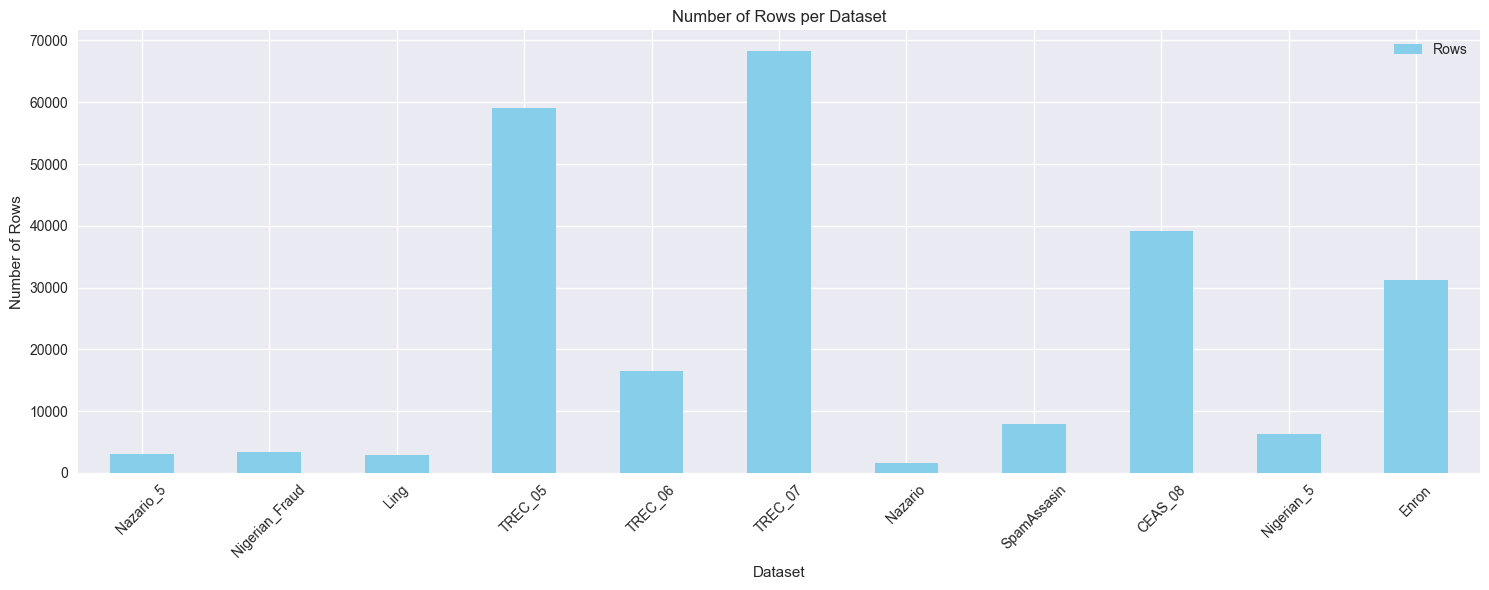

In [7]:
# Visualize dataset sizes
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 6))

# Number of rows
summary_df.plot(x='Dataset', y='Rows', kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Number of Rows per Dataset')
ax1.set_xlabel('Dataset')
ax1.set_ylabel('Number of Rows')
ax1.tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()


## 3. Individual Dataset Analysis


ANALYZING INDIVIDUAL DATASETS:

DATASET: Nazario_5
Shape: (3063, 7)
Columns: ['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls']

Data Types:
sender      object
receiver    object
date        object
subject     object
body        object
label        int64
urls        object
dtype: object

Missing Values:
sender        2
receiver    112
date          3
subject      50
dtype: int64

Original Label Distribution (label):
label
1    1563
0    1500
Name: count, dtype: int64

Cleaned Label Distribution (0/1/other):
label
1    1563
0    1500
Name: count, dtype: int64


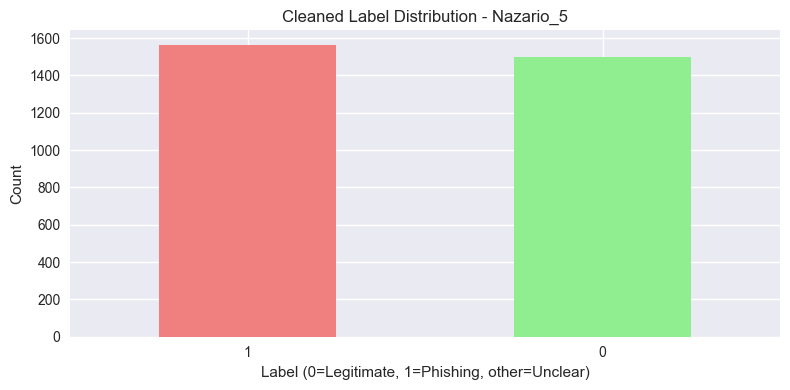


Percentage breakdown:
  1: 1,563 (51.0%)
  0: 1,500 (49.0%)

First 3 rows:
                                 sender  \
0    "Hu, Sylvia" <Sylvia.Hu@ENRON.com>   
1      "Webb, Jay" <Jay.Webb@ENRON.com>   
2  "Symms, Mark" <Mark.Symms@ENRON.com>   

                                            receiver  \
0  "Acevedo, Felecia" <Felecia.Acevedo@ENRON.com>...   
1           "Lambie, Chris" <Chris.Lambie@ENRON.com>   
2        "Thomas, Paul D." <Paul.D.Thomas@ENRON.com>   

                              date  \
0  Fri, 29 Jun 2001 08:36:09 -0500   
1  Fri, 29 Jun 2001 09:37:04 -0500   
2  Fri, 29 Jun 2001 08:39:30 -0500   

                                       subject  \
0  FW: June 29 -- BNA, Inc. Daily Labor Report   
1                           NGX failover plan.   
2                            RE: Intranet Site   

                                                body  label  \
0  User ID:  enrondlr\nPW:        bnaweb22\n\n\n ...      0   
1  \nHi Chris,  \n\nTonight we are rolling out

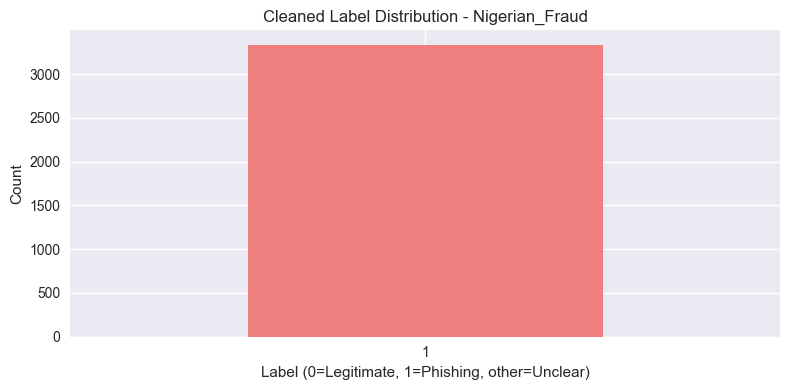


Percentage breakdown:
  1: 3,332 (100.0%)

First 3 rows:
                                           sender              receiver  \
0  MR. JAMES NGOLA. <james_ngola2002@maktoob.com>  webmaster@aclweb.org   
1  Mr. Ben Suleman <bensul2004nng@spinfinder.com>                   R@M   
2       PRINCE OBONG ELEME <obong_715@epatra.com>  webmaster@aclweb.org   

                              date  \
0  Thu, 31 Oct 2002 02:38:20 +0000   
1  Thu, 31 Oct 2002 05:10:00 -0000   
2  Thu, 31 Oct 2002 22:17:55 +0100   

                                      subject  \
0  URGENT BUSINESS ASSISTANCE AND PARTNERSHIP   
1         URGENT ASSISTANCE /RELATIONSHIP (P)   
2                             GOOD DAY TO YOU   

                                                body  urls  label  
0  FROM:MR. JAMES NGOLA.\nCONFIDENTIAL TEL: 233-2...     0      1  
1  Dear Friend,\n\nI am Mr. Ben Suleman a custom ...     0      1  
2  FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...     0      1  

DATASET: Ling
Shap

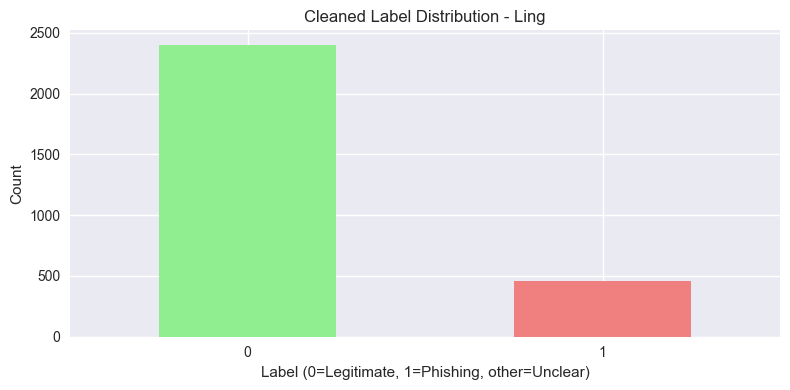


Percentage breakdown:
  0: 2,401 (84.0%)
  1: 458 (16.0%)

First 3 rows:
                                             subject  \
0            job posting - apple-iss research center   
1                                                NaN   
2  query : letter frequencies for text identifica...   

                                                body  label  
0  content - length : 3386 apple-iss research cen...      0  
1  lang classification grimes , joseph e . and ba...      0  
2  i am posting this inquiry for sergei atamas ( ...      0  

DATASET: TREC_05
Shape: (59015, 7)
Columns: ['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls']

Data Types:
sender      object
receiver    object
date        object
subject     object
body        object
label       object
urls        object
dtype: object

Missing Values:
sender        16
receiver    3926
date        4208
subject     4674
body        3513
label       3736
urls        3785
dtype: int64

Original Label Distribution (la

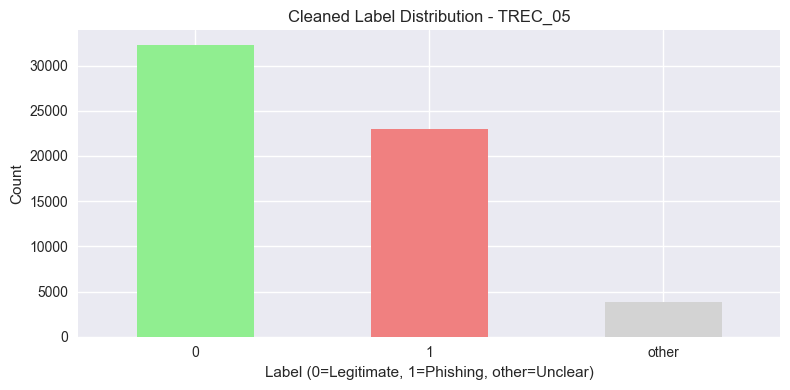


Percentage breakdown:
  0: 32,278 (54.7%)
  1: 22,932 (38.9%)
  other: 3,805 (6.4%)

First 3 rows:
                                 sender  \
0    "Hu, Sylvia" <Sylvia.Hu@ENRON.com>   
1      "Webb, Jay" <Jay.Webb@ENRON.com>   
2  "Symms, Mark" <Mark.Symms@ENRON.com>   

                                            receiver  \
0  "Acevedo, Felecia" <Felecia.Acevedo@ENRON.com>...   
1           "Lambie, Chris" <Chris.Lambie@ENRON.com>   
2        "Thomas, Paul D." <Paul.D.Thomas@ENRON.com>   

                              date  \
0  Fri, 29 Jun 2001 08:36:09 -0500   
1  Fri, 29 Jun 2001 09:37:04 -0500   
2  Fri, 29 Jun 2001 08:39:30 -0500   

                                       subject  \
0  FW: June 29 -- BNA, Inc. Daily Labor Report   
1                           NGX failover plan.   
2                            RE: Intranet Site   

                                                body label urls  
0  User ID:  enrondlr PW:        bnaweb22  -----O...     0    1  
1  \nHi Chris,  

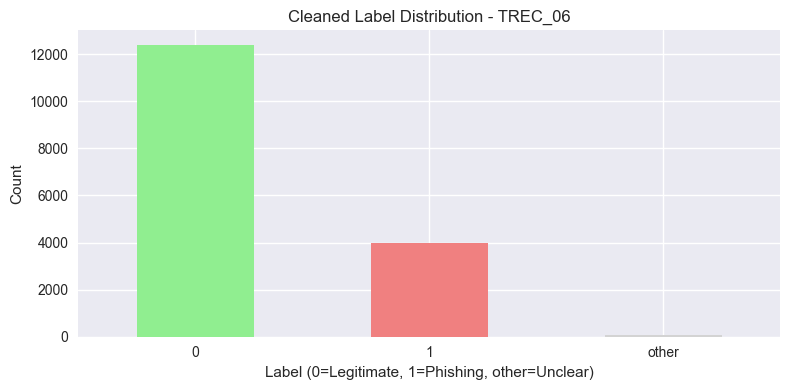


Percentage breakdown:
  0: 12,393 (75.4%)
  1: 3,989 (24.3%)
  other: 57 (0.3%)

First 3 rows:
                                    sender  \
0               jhpb@sarto.budd-lake.nj.us   
1       Stella Lowry <rookcuduq@yahoo.com>   
2  Walter <trwmpca@downtowncumberland.com>   

                             receiver                             date  \
0                                 NaN  Tue, 28 Jul 1992 03:13:55 +0000   
1  Brian <bernice@groucho.cs.psu.edu>  Sat, 03 Apr 1993 10:34:36 -0500   
2           arline@groucho.cs.psu.edu  Tue, 06 Apr 1993 20:33:13 -0600   

                                        subject  \
0  new Catholic mailing list now up and running   
1                                       re[12]:   
2                Take a moment to explore this.   

                                                body  label  urls  
0  The mailing list I queried about a few weeks a...    0.0   0.0  
1             \n                                 ...    1.0   1.0  
2  Academic Q

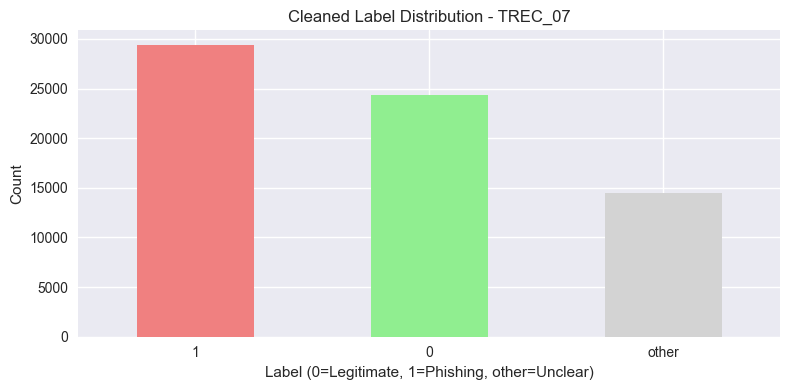


Percentage breakdown:
  1: 29,392 (43.1%)
  0: 24,353 (35.7%)
  other: 14,476 (21.2%)

First 3 rows:
                                              sender  \
0                   Tomas Jacobs <RickyAmes@aol.com>   
1         Yan Morin <yan.morin@savoirfairelinux.com>   
2  Sheila Crenshaw <7stocknews@tractionmarketing....   

                          receiver                             date  \
0        the00@speedy.uwaterloo.ca  Sun, 08 Apr 2007 21:00:48 +0300   
1  debian-mirrors@lists.debian.org  Sun, 08 Apr 2007 12:52:30 -0400   
2           the00@plg.uwaterloo.ca  Sun, 08 Apr 2007 17:12:19 +0000   

                             subject  \
0  Generic Cialis, branded quality@    
1             Typo in /debian/README   
2                   authentic viagra   

                                                body label urls  
0  \n\n\n\n\n\n\nDo you feel the pressure to perf...     1    0  
1  Hi, i've just updated from the gulus and I che...     0    1  
2  Mega  authenticV I A G R A

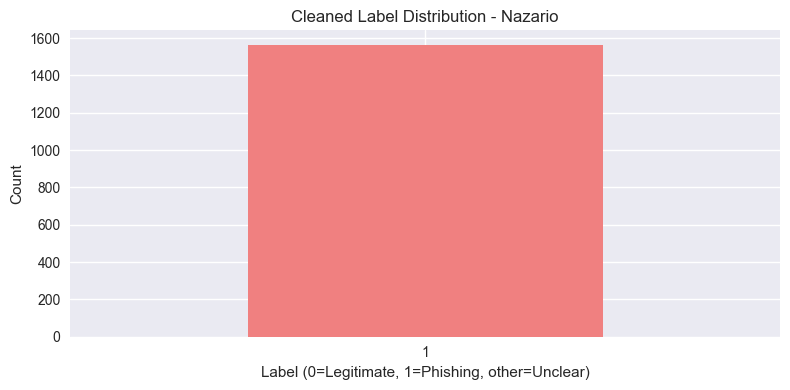


Percentage breakdown:
  1: 1,563 (100.0%)

First 3 rows:
                                            sender  \
0                      cPanel <service@cpanel.com>   
1  Microsoft Outlook <recepcao@unimedceara.com.br>   
2                   Ann Garcia <AnGarcia@mcoe.org>   

                              receiver                                   date  \
0                      jose@monkey.org        Fri, 30 Oct 2015 00:00:48 -0500   
1                                  NaN  Fri, 30 Oct 2015 06:21:59 -0300 (BRT)   
2  "info@maaaaa.org" <info@maaaaa.org>        Fri, 30 Oct 2015 14:54:33 +0000   

                     subject  \
0        Verify Your Account   
1  Helpdesk Mailbox Alert!!!   
2       IT-Service Help Desk   

                                                body  urls  label  
0  Business with  \t\t\t\t\t\t\t\tcPanel & WHM \t...     1      1  
1  Your two incoming mails were placed on pending...     1      1  
2  Password will expire in 3 days. Click Here To ...     0      1  

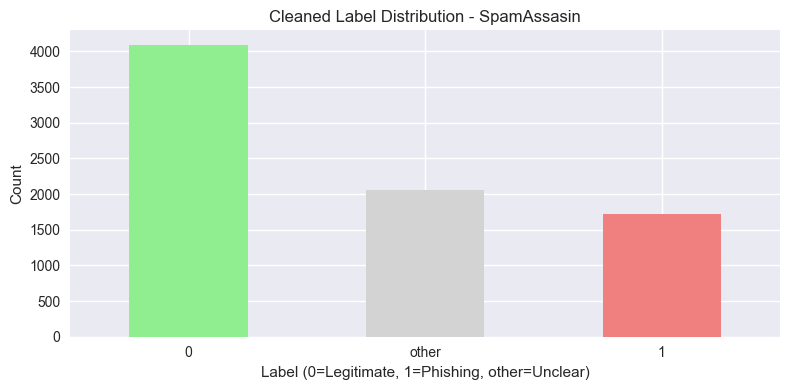


Percentage breakdown:
  0: 4,089 (52.0%)
  other: 2,058 (26.2%)
  1: 1,716 (21.8%)

First 3 rows:
                                      sender  \
0             Robert Elz <kre@munnari.OZ.AU>   
1  Steve Burt <Steve_Burt@cursor-system.com>   
2              "Tim Chapman" <timc@2ubh.com>   

                                            receiver  \
0  Chris Garrigues <cwg-dated-1030377287.06fa6d@D...   
1  "'zzzzteana@yahoogroups.com'" <zzzzteana@yahoo...   
2              zzzzteana <zzzzteana@yahoogroups.com>   

                              date                    subject  \
0  Thu, 22 Aug 2002 18:26:25 +0700   Re: New Sequences Window   
1  Thu, 22 Aug 2002 12:46:18 +0100  [zzzzteana] RE: Alexander   
2  Thu, 22 Aug 2002 13:52:38 +0100  [zzzzteana] Moscow bomber   

                                                body  label  urls  
0  Date:        Wed, 21 Aug 2002 10:54:46 -0500  ...    0.0   1.0  
1  Martin A posted:\nTassos Papadopoulos, the Gre...    0.0   1.0  
2  Man Threatens E

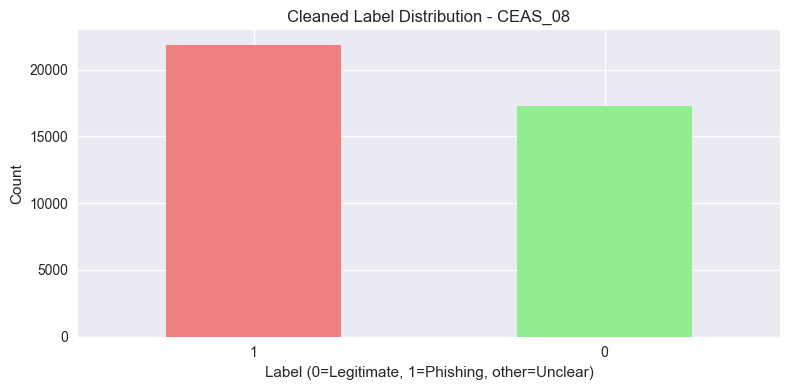


Percentage breakdown:
  1: 21,842 (55.8%)
  0: 17,311 (44.2%)

First 3 rows:
                                              sender  \
0                   Young Esposito <Young@iworld.de>   
1                       Mok <ipline's1983@icable.ph>   
2  Daily Top 10 <Karmandeep-opengevl@universalnet...   

                        receiver                             date  \
0    user4@gvc.ceas-challenge.cc  Tue, 05 Aug 2008 16:31:02 -0700   
1  user2.2@gvc.ceas-challenge.cc  Tue, 05 Aug 2008 18:31:03 -0500   
2  user2.9@gvc.ceas-challenge.cc  Tue, 05 Aug 2008 20:28:00 -1200   

                     subject  \
0  Never agree to be a loser   
1     Befriend Jenna Jameson   
2       CNN.com Daily Top 10   

                                                body  label  urls  
0  Buck up, your troubles caused by small dimensi...      1     1  
1  \nUpgrade your sex and pleasures with these te...      1     1  
2  >+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...      1     1  

DATASET: Nigerian_

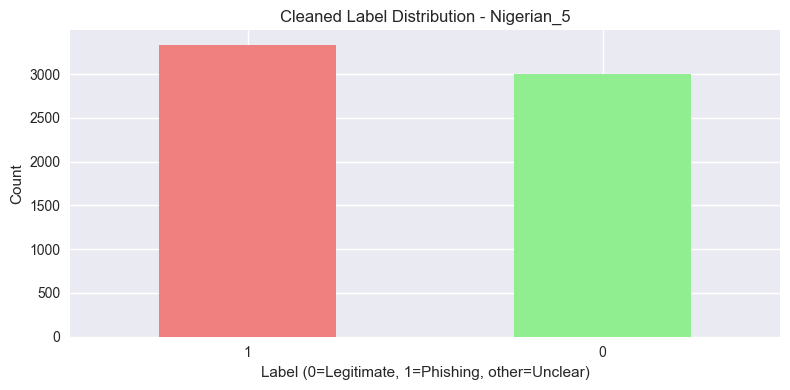


Percentage breakdown:
  1: 3,332 (52.6%)
  0: 2,997 (47.4%)

First 3 rows:
                                 sender  \
0    "Hu, Sylvia" <Sylvia.Hu@ENRON.com>   
1      "Webb, Jay" <Jay.Webb@ENRON.com>   
2  "Symms, Mark" <Mark.Symms@ENRON.com>   

                                            receiver  \
0  "Acevedo, Felecia" <Felecia.Acevedo@ENRON.com>...   
1           "Lambie, Chris" <Chris.Lambie@ENRON.com>   
2        "Thomas, Paul D." <Paul.D.Thomas@ENRON.com>   

                              date  \
0  Fri, 29 Jun 2001 08:36:09 -0500   
1  Fri, 29 Jun 2001 09:37:04 -0500   
2  Fri, 29 Jun 2001 08:39:30 -0500   

                                       subject  \
0  FW: June 29 -- BNA, Inc. Daily Labor Report   
1                           NGX failover plan.   
2                            RE: Intranet Site   

                                                body  label  urls  
0  User ID:  enrondlr PW:        bnaweb22  -----O...      0     1  
1  \nHi Chris,  \n\nTonight we are r

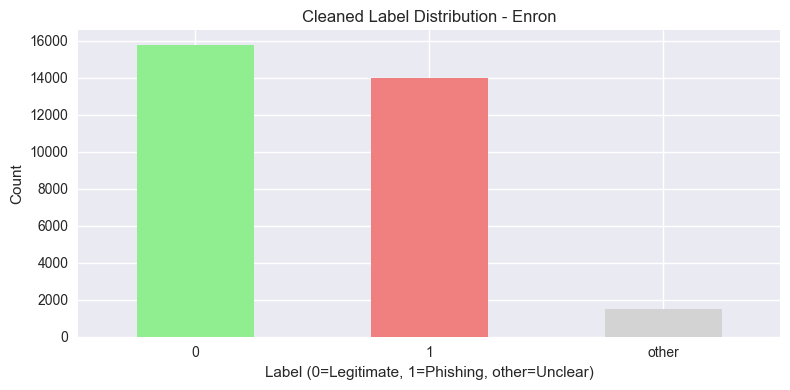


Percentage breakdown:
  0: 15,787 (50.5%)
  1: 13,976 (44.7%)
  other: 1,512 (4.8%)

First 3 rows:
                                      subject  \
0                   hpl nom for may 25 , 2001   
1            re : nom / actual vols for 24 th   
2  enron actuals for march 30 - april 1 , 201   

                                                body label  
0  ( see attached file : hplno 525 . xls )\n- hpl...     0  
1  - - - - - - - - - - - - - - - - - - - - - - fo...     0  
2  estimated actuals\nmarch 30 , 2001\nno flow\nm...     0  


In [8]:
def clean_labels(labels):
    """Convert labels to 0, 1, or 'other' categories"""
    def categorize_label(label):
        # Handle NaN/None values
        if pd.isna(label):
            return 'other'
            
        # Convert to string and clean
        label_str = str(label).strip().lower()
        
        # Handle different representations of 0 (legitimate/ham)
        if label_str in ['0', '0.0', 'false', 'ham', 'legitimate', 'normal']:
            return 0
        # Handle different representations of 1 (phishing/spam)
        elif label_str in ['1', '1.0', 'true', 'spam', 'phishing', 'malicious']:
            return 1
        # Everything else becomes "other"
        else:
            return 'other'
    
    return labels.apply(categorize_label)

# Function to analyze individual datasets with label cleaning
def analyze_dataset(name, df):
    print(f"\n{'='*60}")
    print(f"DATASET: {name}")
    print(f"{'='*60}")
    
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    
    print("\nData Types:")
    print(df.dtypes)
    
    print("\nMissing Values:")
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print(missing[missing > 0])
    else:
        print("No missing values")
    
    # Check for label column
    label_cols = [col for col in df.columns if 'label' in col.lower()]
    if label_cols:
        label_col = label_cols[0]
        
        # Show original label distribution first
        print(f"\nOriginal Label Distribution ({label_col}):")
        original_counts = df[label_col].value_counts()
        print(original_counts)
        
        # Clean labels and show cleaned distribution
        cleaned_labels = clean_labels(df[label_col])
        cleaned_counts = cleaned_labels.value_counts()
        
        print(f"\nCleaned Label Distribution (0/1/other):")
        print(cleaned_counts)
        

        # Plot cleaned label distribution
        plt.figure(figsize=(8, 4))
        colors = ['lightgreen' if x == 0 else 'lightcoral' if x == 1 else 'lightgray' for x in cleaned_counts.index]
        cleaned_counts.plot(kind='bar', color=colors)
        plt.title(f'Cleaned Label Distribution - {name}')
        plt.xlabel('Label (0=Legitimate, 1=Phishing, other=Unclear)')
        plt.ylabel('Count')
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()
        
        # Show percentage breakdown
        total = len(df)
        print(f"\nPercentage breakdown:")
        for label, count in cleaned_counts.items():
            percentage = (count / total) * 100
            print(f"  {label}: {count:,} ({percentage:.1f}%)")

    
    print("\nFirst 3 rows:")
    print(df.head(3))
    
    return label_cols

# Analyze each dataset
print("ANALYZING INDIVIDUAL DATASETS:")
print("=" * 60)

label_info = {}
for name, df in datasets.items():
    label_cols = analyze_dataset(name, df)
    label_info[name] = label_cols


## 4. Text Analysis


In [9]:
# Function to analyze text columns
def analyze_text_columns(name, df):
    text_cols = []
    for col in df.columns:
        if df[col].dtype == 'object' and col.lower() not in ['label', 'sender', 'receiver', 'date']:
            text_cols.append(col)
    
    if not text_cols:
        return
    
    print(f"\nText Analysis for {name}:")
    print("-" * 40)
    
    for col in text_cols:
        if col in df.columns:
            # Calculate text statistics
            text_lengths = df[col].dropna().astype(str).str.len()
            word_counts = df[col].dropna().astype(str).str.split().str.len()
            
            print(f"\n{col} Column:")
            print(f"  Average length: {text_lengths.mean():.1f} characters")
            print(f"  Average words: {word_counts.mean():.1f} words")
            print(f"  Max length: {text_lengths.max()} characters")
            print(f"  Min length: {text_lengths.min()} characters")

# Analyze text for each dataset
for name, df in datasets.items():
    analyze_text_columns(name, df)



Text Analysis for Nazario_5:
----------------------------------------

subject Column:
  Average length: 39.9 characters
  Average words: 5.4 words
  Max length: 510 characters
  Min length: 3 characters

body Column:
  Average length: 1711.3 characters
  Average words: 237.7 words
  Max length: 57732 characters
  Min length: 1 characters

urls Column:
  Average length: 58.6 characters
  Average words: 1.8 words
  Max length: 18876 characters
  Min length: 1 characters

Text Analysis for Nigerian_Fraud:
----------------------------------------

subject Column:
  Average length: 22.4 characters
  Average words: 3.5 words
  Max length: 2657 characters
  Min length: 2 characters

body Column:
  Average length: 2644.4 characters
  Average words: 443.3 words
  Max length: 124969 characters
  Min length: 2 characters

Text Analysis for Ling:
----------------------------------------

subject Column:
  Average length: 32.5 characters
  Average words: 6.0 words
  Max length: 161 characters
  M

## 5. Label Distribution Comparison


In [10]:
for name, df in datasets.items():
    label_cols = [col for col in df.columns if 'label' in col.lower()]
    if label_cols:
        label_col = label_cols[0]
        unique_values = df[label_col].unique()
        
        print(f"\nDataset: {name}")
        print(f"Label column: {label_col}")
        print(f"Number of unique values: {len(unique_values)}")
        print(f"Data type: {df[label_col].dtype}")
        
        # Show first few unique values
        print("First 10 unique values:")
        for i, val in enumerate(unique_values[:10]):
            val_str = str(val)
            if len(val_str) > 100:
                val_str = val_str[:100] + "..."
            print(f"  {i+1}. {val_str}")
        
        avg_length = df[label_col].astype(str).str.len().mean()
        print(f"Average value length: {avg_length:.1f} characters")
        print("\n" + "-" * 80)
    




Dataset: Nazario_5
Label column: label
Number of unique values: 2
Data type: int64
First 10 unique values:
  1. 0
  2. 1
Average value length: 1.0 characters

--------------------------------------------------------------------------------

Dataset: Nigerian_Fraud
Label column: label
Number of unique values: 1
Data type: int64
First 10 unique values:
  1. 1
Average value length: 1.0 characters

--------------------------------------------------------------------------------

Dataset: Ling
Label column: label
Number of unique values: 2
Data type: int64
First 10 unique values:
  1. 0
  2. 1
Average value length: 1.0 characters

--------------------------------------------------------------------------------

Dataset: TREC_05
Label column: label
Number of unique values: 69
Data type: object
First 10 unique values:
  1. 0
  2. 1
  3. None
  4.  and former Energy Department Secretary James Schlesinger. 
  5.  and 40
  6.  according to Trione & Gordon. 
  7.  9p stronger at 565p after Saudi

## 6. Sample Data Exploration


In [11]:
# Show sample emails from different datasets
def show_sample_emails(name, df, n_samples=2):
    print(f"\nSample emails from {name}:")
    print("=" * 80)
    
    # Find text columns
    text_cols = [col for col in df.columns if col.lower() in ['subject', 'body', 'text', 'message']]
    label_cols = [col for col in df.columns if 'label' in col.lower()]
    
    if text_cols and len(df) > 0:
        sample_indices = np.random.choice(len(df), min(n_samples, len(df)), replace=False)
        
        for i, idx in enumerate(sample_indices):
            print(f"\nSample {i+1}:")
            print("-" * 80)
            
            # Show label if available
            if label_cols:
                print(f"Label: {df.iloc[idx][label_cols[0]]}")
            
            # Show text content
            for col in text_cols:
                content = str(df.iloc[idx][col])[:500]  # Limit to first 500 chars
                print(f"{col}: {content}{'...' if len(str(df.iloc[idx][col])) > 500 else ''}")

# Show samples from a few datasets
sample_datasets = list(datasets.keys())[:3]  # First 3 datasets
for name in sample_datasets:
    if name in datasets:
        show_sample_emails(name, datasets[name])



Sample emails from Nazario_5:

Sample 1:
--------------------------------------------------------------------------------
Label: 1
subject: RE: ACTION REQUIRED:  General Notification
body: x eWebmailAlert#  Take note of this important update that our new web mail has been improved with a new messaging system for outlook which also include extra 10GB usage on email, shared calendar,web-documents and the new 2017 anti-spam version. Please use the link below to complete your update to the new server. CLICK on webmail  to update Regards, IT Service Desk Support. DISCLAIMER: This message is intended exclusively for the addressee(s) and may contain confidential and privileged informatio...

Sample 2:
--------------------------------------------------------------------------------
Label: 1
subject: Self Service Password Reset System
body: Your mailbox is almost full. Please Click Here immediately to Validate e-mail IT-Service Help Desk Your mailbox is almost full. Please Click Here immediate

## 7. Data Quality Assessment


In [12]:
# Assess data quality
quality_assessment = []

for name, df in datasets.items():
    # Calculate various quality metrics
    total_rows = len(df)
    total_missing = df.isnull().sum().sum()
    missing_percentage = (total_missing / (total_rows * len(df.columns))) * 100
    
    # Check for duplicate rows
    duplicates = df.duplicated().sum()
    duplicate_percentage = (duplicates / total_rows) * 100
    
    # Check for empty text fields
    text_cols = [col for col in df.columns if df[col].dtype == 'object']
    empty_text = 0
    for col in text_cols:
        empty_text += (df[col].astype(str).str.strip() == '').sum()
    
    quality_assessment.append({
        'Dataset': name,
        'Total Rows': total_rows,
        'Missing Values': total_missing,
        'Missing %': round(missing_percentage, 2),
        'Duplicates': duplicates,
        'Duplicate %': round(duplicate_percentage, 2),
        'Empty Text Fields': empty_text
    })

quality_df = pd.DataFrame(quality_assessment)
print("Data Quality Assessment:")
print(quality_df.to_string(index=False))


Data Quality Assessment:
       Dataset  Total Rows  Missing Values  Missing %  Duplicates  Duplicate %  Empty Text Fields
     Nazario_5        3063             167       0.78           0         0.00                  2
Nigerian_Fraud        3332            2176       9.33           0         0.00                  1
          Ling        2859              62       0.72           0         0.00                  0
       TREC_05       59015           23858       5.78         533         0.90                  4
       TREC_06       16439            1824       1.59           3         0.02                  0
       TREC_07       68221           79500      16.65        4251         6.23               1147
       Nazario        1563             100       0.91           0         0.00                  2
   SpamAssasin        7863           12554      22.81          12         0.15                  1
       CEAS_08       39153             490       0.18           0         0.00               

## 8. Unified Dataset Construction

In [13]:
# Function to clean and standardize label values
def standardize_label(label):
    """Convert label to 0 or 1, return None for other values"""
    if pd.isna(label):
        return None
        
    label_str = str(label).strip().lower()
    
    # Handle different representations of 0 (legitimate/ham)
    if label_str in ['0', '0.0', 'false', 'ham', 'legitimate', 'normal']:
        return 0
    # Handle different representations of 1 (phishing/spam)
    elif label_str in ['1', '1.0', 'true', 'spam', 'phishing', 'malicious']:
        return 1
    # Return None for everything else (will be filtered out)
    else:
        return None

# Function to extract required columns from each dataset
def extract_columns(df, dataset_name):
    """Extract subject, body, label columns and add source information"""
    extracted_data = []
    
    # Find available columns
    subject_col = None
    body_col = None
    label_col = None
    
    # Map column names (case insensitive)
    for col in df.columns:
        col_lower = col.lower()
        if col_lower == 'subject':
            subject_col = col
        elif col_lower == 'body':
            body_col = col
        elif col_lower == 'label':
            label_col = col
    
    # Process each row
    for idx, row in df.iterrows():
        # Extract data
        subject = row[subject_col] if subject_col else ""
        body = row[body_col] if body_col else ""
        original_label = row[label_col]
        
        # Standardize label
        clean_label = standardize_label(original_label)
        
        # Only include if label is 0 or 1
        if clean_label is not None:
            extracted_data.append({
                'subject': str(subject) if pd.notna(subject) else "",
                'body': str(body) if pd.notna(body) else "",
                'label': clean_label,
                'source': dataset_name
            })
    
    return pd.DataFrame(extracted_data)

# Construct the unified dataset
print("CONSTRUCTING UNIFIED DATASET:")
print("=" * 50)

unified_data_list = []
dataset_stats = []

for dataset_name, df in datasets.items():
    print(f"\nProcessing {dataset_name}...")
    
    # Extract and clean data
    extracted_df = extract_columns(df, dataset_name)
    

    # Remove rows with missing subject or body
    before_cleaning = len(extracted_df)
    extracted_df = extracted_df.dropna(subset=['subject', 'body'])
    
    # Remove rows where subject and body are both empty
    extracted_df = extracted_df[
        (extracted_df['subject'].str.strip() != "") | 
        (extracted_df['body'].str.strip() != "")
    ]
    
    after_cleaning = len(extracted_df)
    removed_count = before_cleaning - after_cleaning
    

    unified_data_list.append(extracted_df)
    
    # Calculate statistics
    label_dist = extracted_df['label'].value_counts()
    dataset_stats.append({
        'Source': dataset_name,
        'Original_Rows': len(df),
        'Valid_Labels': before_cleaning,
        'After_Cleaning': after_cleaning,
        'Removed': removed_count,
        'Label_0': label_dist.get(0, 0),
        'Label_1': label_dist.get(1, 0)
    })
    
    print(f"Extracted {after_cleaning:,} valid records")
    print(f"Label distribution: 0={label_dist.get(0, 0):,}, 1={label_dist.get(1, 0):,}")
    if removed_count > 0:
        print(f"Removed {removed_count:,} records with missing/empty text")


CONSTRUCTING UNIFIED DATASET:

Processing Nazario_5...
Extracted 3,063 valid records
Label distribution: 0=1,500, 1=1,563

Processing Nigerian_Fraud...
Extracted 3,332 valid records
Label distribution: 0=0, 1=3,332

Processing Ling...
Extracted 2,859 valid records
Label distribution: 0=2,401, 1=458

Processing TREC_05...
Extracted 55,210 valid records
Label distribution: 0=32,278, 1=22,932

Processing TREC_06...
Extracted 16,382 valid records
Label distribution: 0=12,393, 1=3,989

Processing TREC_07...
Extracted 53,745 valid records
Label distribution: 0=24,353, 1=29,392

Processing Nazario...
Extracted 1,563 valid records
Label distribution: 0=0, 1=1,563

Processing SpamAssasin...
Extracted 5,805 valid records
Label distribution: 0=4,089, 1=1,716

Processing CEAS_08...
Extracted 39,153 valid records
Label distribution: 0=17,311, 1=21,842

Processing Nigerian_5...
Extracted 6,329 valid records
Label distribution: 0=2,997, 1=3,332

Processing Enron...
Extracted 29,763 valid records
Labe

In [14]:
unified_dataset = pd.concat(unified_data_list, ignore_index=True)

print(f"Total records: {len(unified_dataset):,}")
print(f"Total datasets: {len(unified_data_list)}")

# Final statistics
label_distribution = unified_dataset['label'].value_counts()
source_distribution = unified_dataset['source'].value_counts()

print(f"\nFinal Label Distribution:")
print(f"  Legitimate (0): {label_distribution.get(0, 0):,} ({label_distribution.get(0, 0)/len(unified_dataset)*100:.1f}%)")
print(f"  Phishing (1): {label_distribution.get(1, 0):,} ({label_distribution.get(1, 0)/len(unified_dataset)*100:.1f}%)")

print(f"\nSource Distribution:")
for source, count in source_distribution.items():
    percentage = count / len(unified_dataset) * 100
    print(f"  {source}: {count:,} ({percentage:.1f}%)")

# Display extraction statistics
print(f"\n{'='*60}")
print("EXTRACTION STATISTICS:")
print(f"{'='*60}")
stats_df = pd.DataFrame(dataset_stats)
print(stats_df.to_string(index=False))

Total records: 217,204
Total datasets: 11

Final Label Distribution:
  Legitimate (0): 113,109 (52.1%)
  Phishing (1): 104,095 (47.9%)

Source Distribution:
  TREC_05: 55,210 (25.4%)
  TREC_07: 53,745 (24.7%)
  CEAS_08: 39,153 (18.0%)
  Enron: 29,763 (13.7%)
  TREC_06: 16,382 (7.5%)
  Nigerian_5: 6,329 (2.9%)
  SpamAssasin: 5,805 (2.7%)
  Nigerian_Fraud: 3,332 (1.5%)
  Nazario_5: 3,063 (1.4%)
  Ling: 2,859 (1.3%)
  Nazario: 1,563 (0.7%)

EXTRACTION STATISTICS:
        Source  Original_Rows  Valid_Labels  After_Cleaning  Removed  Label_0  Label_1
     Nazario_5           3063          3063            3063        0     1500     1563
Nigerian_Fraud           3332          3332            3332        0        0     3332
          Ling           2859          2859            2859        0     2401      458
       TREC_05          59015         55210           55210        0    32278    22932
       TREC_06          16439         16382           16382        0    12393     3989
       TREC_0

In [15]:
# Display sample of the unified dataset
print("UNIFIED DATASET PREVIEW:")
print("=" * 50)

print(f"\nDataset Shape: {unified_dataset.shape}")
print(f"Columns: {list(unified_dataset.columns)}")

print(f"\nData Types:")
print(unified_dataset.dtypes)

print(f"\nFirst 5 rows:")
display_df = unified_dataset.head().copy()

# Truncate long text for display
for col in ['subject', 'body']:
    display_df[col] = display_df[col].astype(str).apply(
        lambda x: x[:100] + "..." if len(x) > 100 else x
    )

print(display_df.to_string(index=False))

# Check for any remaining issues
print(f"\n{'='*60}")
print("DATA QUALITY CHECK:")
print(f"{'='*60}")

# Check for missing values
missing_check = unified_dataset.isnull().sum()
print(f"Missing values:")
print(missing_check)

# Check for empty strings
empty_subjects = (unified_dataset['subject'].str.strip() == '').sum()
empty_bodies = (unified_dataset['body'].str.strip() == '').sum()
both_empty = ((unified_dataset['subject'].str.strip() == '') & 
                (unified_dataset['body'].str.strip() == '')).sum()

print(f"\nEmpty text fields:")
print(f"  Empty subjects: {empty_subjects:,}")
print(f"  Empty bodies: {empty_bodies:,}")
print(f"  Both empty: {both_empty:,}")

# Label verification
unique_labels = unified_dataset['label'].unique()
print(f"\nLabel verification:")
print(f"  Unique labels: {sorted(unique_labels)}")
print(f"  All labels are 0 or 1: {set(unique_labels).issubset({0, 1})}")

# Text length statistics
unified_dataset['subject_length'] = unified_dataset['subject'].str.len()
unified_dataset['body_length'] = unified_dataset['body'].str.len()

print(f"\nText length statistics:")
print(f"  Subject length - Mean: {unified_dataset['subject_length'].mean():.1f}, Max: {unified_dataset['subject_length'].max()}")
print(f"  Body length - Mean: {unified_dataset['body_length'].mean():.1f}, Max: {unified_dataset['body_length'].max()}")

# Clean up temporary columns
unified_dataset = unified_dataset.drop(['subject_length', 'body_length'], axis=1)
        



UNIFIED DATASET PREVIEW:

Dataset Shape: (217204, 4)
Columns: ['subject', 'body', 'label', 'source']

Data Types:
subject    object
body       object
label       int64
source     object
dtype: object

First 5 rows:
                                    subject                                                                                                          body  label    source
FW: June 29 -- BNA, Inc. Daily Labor Report User ID:  enrondlr\nPW:        bnaweb22\n\n\n -----Original Message-----\nFrom: \t"BNA Highlights" <bhighl...      0 Nazario_5
                         NGX failover plan.    \nHi Chris,  \n\nTonight we are rolling out a new report.  Currently, only you and Jon have access to i...      0 Nazario_5
                          RE: Intranet Site Rika r these new?\n\n -----Original Message-----\nFrom: \tThomas, Paul D.  \nSent:\tFriday, June 29, 2001 ...      0 Nazario_5
       FW: ENA Upstream Company information     John/Gerald,\n\nWe are currently trading under GTC Sp

In [16]:
# Save the unified dataset
output_filename = 'unified_phishing_email_dataset.csv'
unified_dataset.to_csv(output_filename, index=False)

print(f"DATASET SAVED:")
print(f"Filename: {output_filename}")
print(f"Size: {len(unified_dataset):,} records")
print(f"Columns: {', '.join(unified_dataset.columns)}")

# Create a summary file
summary_stats = {
    'total_records': len(unified_dataset),
    'legitimate_emails': (unified_dataset['label'] == 0).sum(),
    'phishing_emails': (unified_dataset['label'] == 1).sum(),
    'source_datasets': unified_dataset['source'].nunique(),
    'sources': unified_dataset['source'].value_counts().to_dict()
}

print(f"\nFINAL SUMMARY:")
print(f"Total Records: {summary_stats['total_records']:,}")
print(f"Legitimate (0): {summary_stats['legitimate_emails']:,}")
print(f"Phishing (1): {summary_stats['phishing_emails']:,}")
print(f"Source Datasets: {summary_stats['source_datasets']}")

# Calculate balance ratio
if summary_stats['legitimate_emails'] > 0 and summary_stats['phishing_emails'] > 0:
    ratio = min(summary_stats['legitimate_emails'], summary_stats['phishing_emails']) / max(summary_stats['legitimate_emails'], summary_stats['phishing_emails'])
    print(f"   Balance Ratio: {ratio:.2f} (1.0 = perfectly balanced)")


DATASET SAVED:
Filename: unified_phishing_email_dataset.csv
Size: 217,204 records
Columns: subject, body, label, source

FINAL SUMMARY:
Total Records: 217,204
Legitimate (0): 113,109
Phishing (1): 104,095
Source Datasets: 11
   Balance Ratio: 0.92 (1.0 = perfectly balanced)
